In [1]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# SQL query
import wrangle
# fill missing values
from sklearn.impute import SimpleImputer

Acquire the data

In [2]:
# use the wrangle.py file to get the zillow data
zillow_data = wrangle.get_zillow17_data()

Sorry, nothing on file, let me create one for you...


In [3]:
# summerize the data
zillow_data.head()


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
# Look at the data types
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
zillow_data.shape

(2152863, 7)

Take aways:

- Alot of the data is missing
- There are some redundant columns(unnamed_0, id, index)
- IDs that refered to extenal sources need to join in

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

Prepare the data

In [6]:
# check for missing values
zillow_data.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [7]:
# fill all missing values utilizing simple imputation
imputer = SimpleImputer(strategy='median')

In [8]:
# create a loop to impute the missing values exclude the fips and yearbuilt columns
for col in zillow_data.columns:
    if col not in ['fips', 'yearbuilt']:
        zillow_data[col] = imputer.fit_transform(zillow_data[col].values.reshape(-1, 1))

In [9]:
# check for missing values
zillow_data.isnull().sum()

bedroomcnt                         0
bathroomcnt                        0
calculatedfinishedsquarefeet       0
taxvaluedollarcnt                  0
yearbuilt                       9337
taxamount                          0
fips                               0
dtype: int64

In [22]:
# impute the missing values for the fips and yearbuilt columns using the median
zillow_data['fips'].fillna(zillow_data['fips'].median(), inplace=True)

In [23]:
# check for missing values
zillow_data.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [10]:
# identify the outliers
zillow_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152863.0,3.287195,0.954752,0.00,3.00,3.00,4.0,25.00
bathroomcnt,2152863.0,2.230686,0.999277,0.00,2.00,2.00,3.0,32.00
calculatedfinishedsquarefeet,2152863.0,1861.909957,1219.807239,1.00,1259.00,1623.00,2204.0,952576.00
taxvaluedollarcnt,2152863.0,461865.500734,699598.880941,1.00,188216.00,327671.00,534455.0,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.0,2016.00
taxamount,2152863.0,5631.717557,8170.761507,1.85,2538.28,4108.95,6406.9,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.0,6111.00


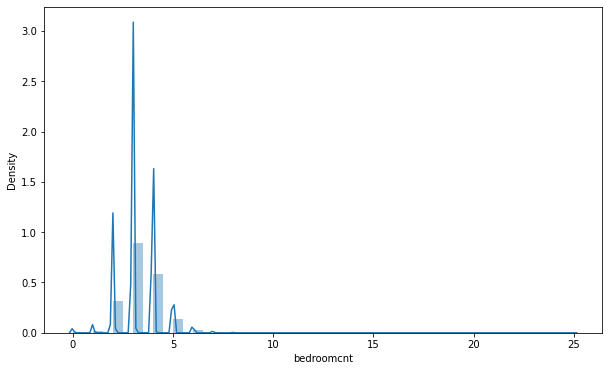

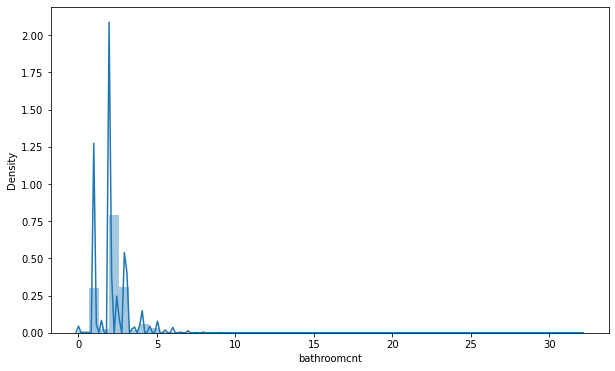

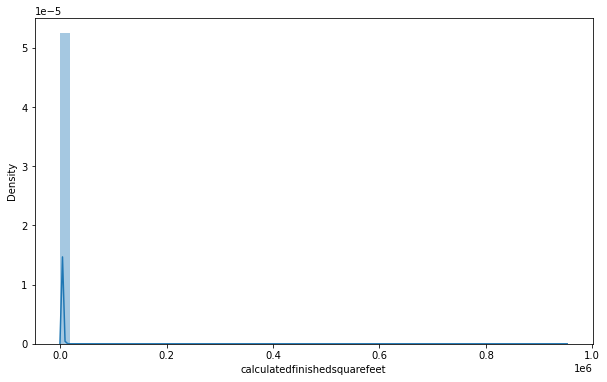

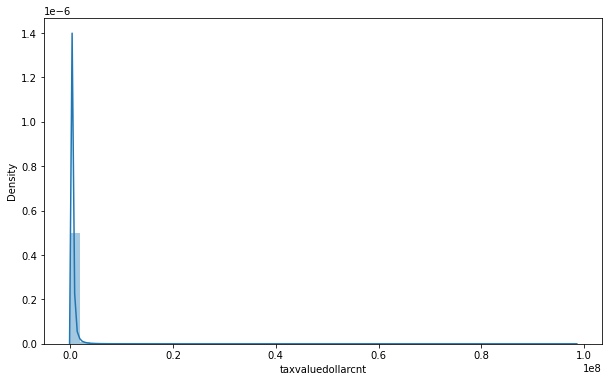

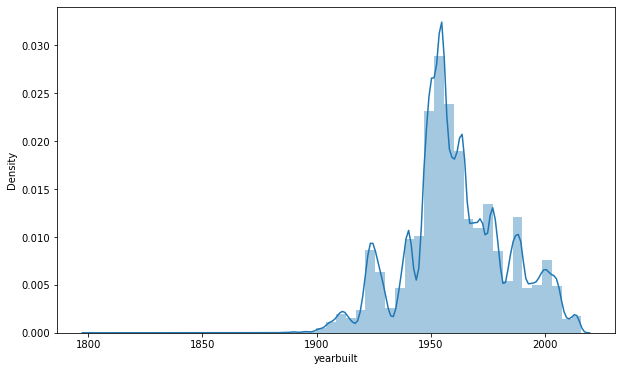

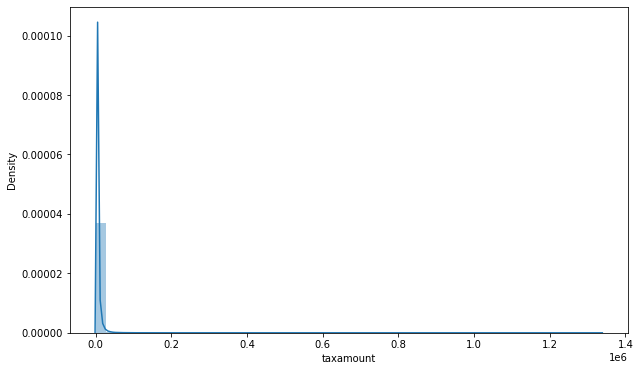

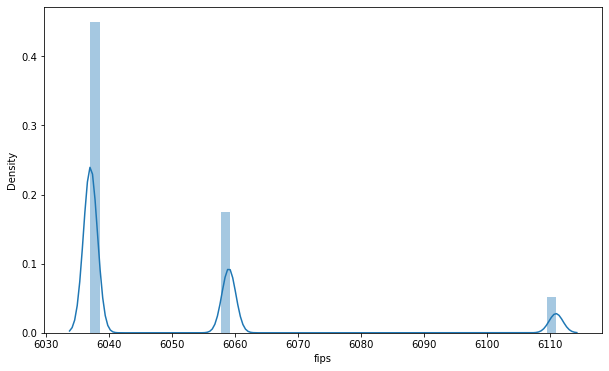

In [11]:
# visualize the distribution of each column
for col in zillow_data.columns:
        plt.figure(figsize=(10, 6))
        sns.distplot(zillow_data[col], bins=50)
        plt.show()

In [12]:
# create a loop thats removes the outliers from all columns except fips
for col in zillow_data.columns:
        if col != 'fips':
                zillow_data = wrangle.remove_outliers(zillow_data, 1.5, col)

In [13]:
# check the data again
zillow_data.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1800959.0,3.219400,0.777458,2.00,3.0,3.00,4.00,5.00
bathroomcnt,1800959.0,2.060395,0.699620,1.00,2.0,2.00,2.50,4.00
calculatedfinishedsquarefeet,1800959.0,1652.971858,561.917333,1.00,1232.0,1548.00,1984.00,3408.00
taxvaluedollarcnt,1800959.0,327869.896211,198065.702406,1.00,174045.0,297319.00,452000.00,950940.00
yearbuilt,1800959.0,1960.091627,18.855658,1915.00,1950.0,1957.00,1972.00,2006.00
taxamount,1800959.0,4065.181178,2225.130480,16.48,2376.0,3753.31,5474.76,10321.16
fips,1800959.0,6048.515153,20.644962,6037.00,6037.0,6037.00,6059.00,6111.00


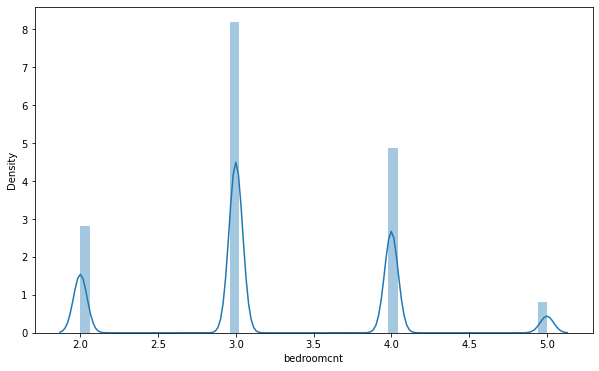

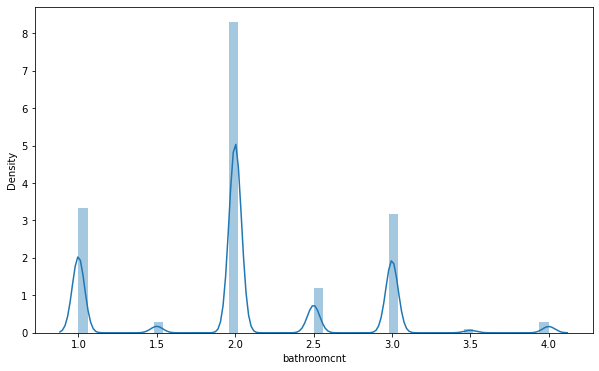

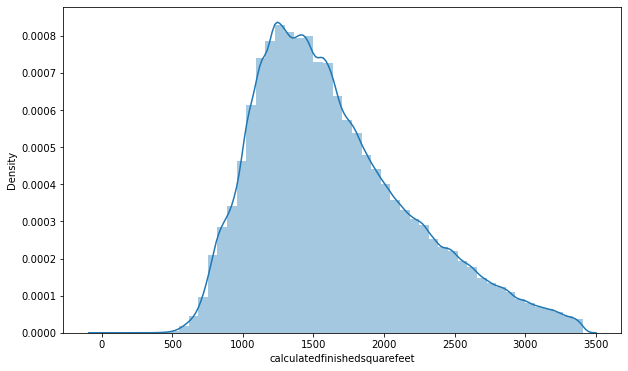

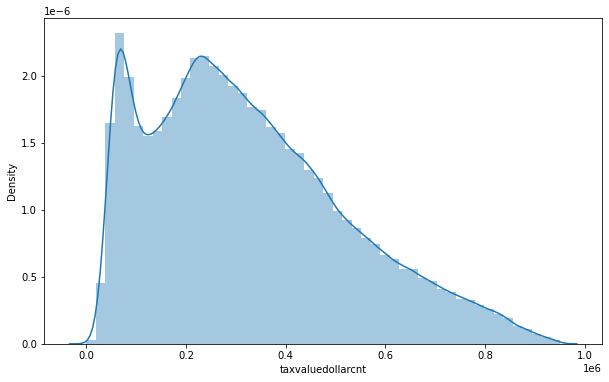

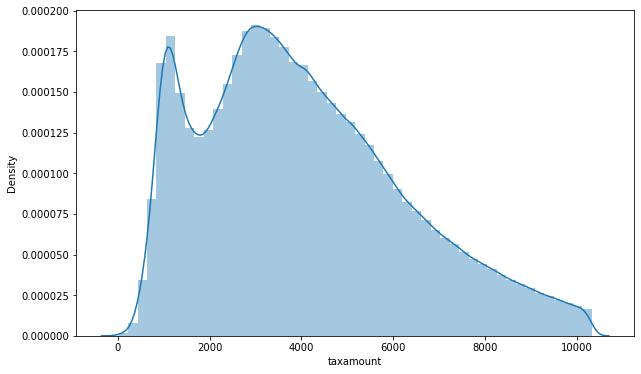

In [14]:
# visualize the distribution of each column
for col in zillow_data.columns:
    if col not in ['fips', 'yearbuilt']:
        plt.figure(figsize=(10, 6))
        sns.distplot(zillow_data[col], bins=50)
        plt.show()

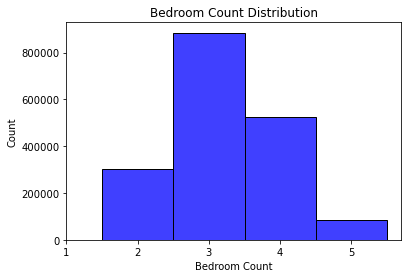

In [15]:
# bedroomcnt distribution utilizing histogram with lables
sns.histplot(zillow_data['bedroomcnt'], bins=20, color='blue', edgecolor='black', discrete=True)
plt.xticks(np.arange(1, 6, 1))
plt.xlabel('Bedroom Count')
plt.ylabel('Count')
plt.title('Bedroom Count Distribution')
plt.show()

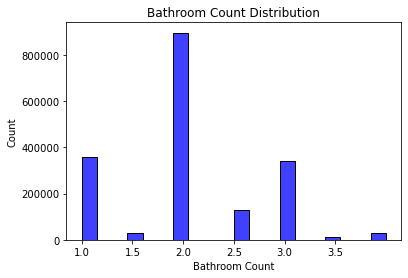

In [16]:
# bathroomcnt distribution with lables
sns.histplot(zillow_data['bathroomcnt'],bins=20, color='blue', edgecolor='black')
plt.xticks(np.arange(1, 4, .5))
plt.xlabel('Bathroom Count')
plt.ylabel('Count')
plt.title('Bathroom Count Distribution')
plt.show()

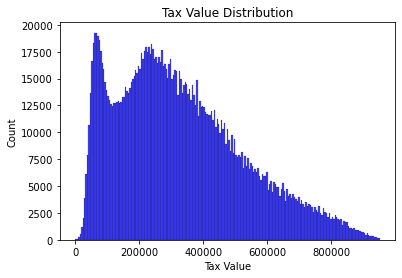

In [17]:
# taxvaluedollarcnt distribution with lables
sns.histplot(zillow_data['taxvaluedollarcnt'], color='blue', edgecolor='black')
plt.xlabel('Tax Value')
plt.ylabel('Count')
plt.title('Tax Value Distribution')
plt.show()

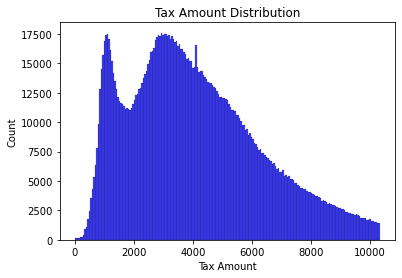

In [18]:
# taxamount distribution with lables
sns.histplot(zillow_data['taxamount'], color='blue', edgecolor='black')
plt.xlabel('Tax Amount')
plt.ylabel('Count')
plt.title('Tax Amount Distribution')
plt.show()

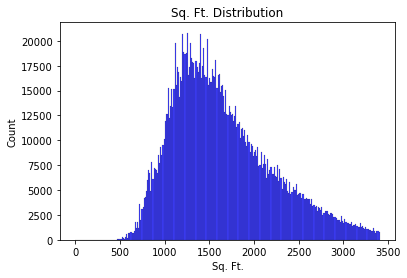

In [19]:
# calculatedfinishedsquarefeet distribution with lables
sns.histplot(zillow_data['calculatedfinishedsquarefeet'], color='blue', edgecolor='black')
plt.xlabel('Sq. Ft.')
plt.ylabel('Count')
plt.title('Sq. Ft. Distribution')
plt.show()

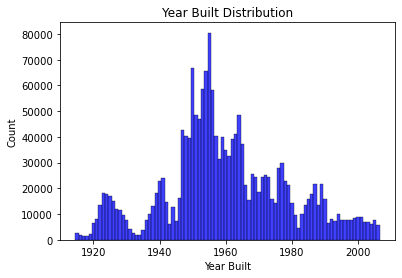

In [20]:
# yearbuilt distribution with lables
sns.histplot(zillow_data['yearbuilt'], color='blue', edgecolor='black', discrete=True)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Year Built Distribution')
plt.show()

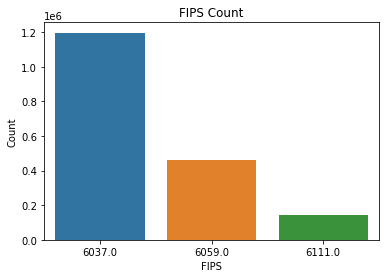

In [21]:
# visualize fibs with a countplot
sns.countplot(zillow_data['fips'])
plt.xlabel('FIPS')
plt.ylabel('Count')
plt.title('FIPS Count')
plt.show()